In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import seaborn as sns
plt.style.use('ggplot')
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
FILEPATH = '/content/drive/MyDrive/data'
MODEL_CHECKPOINT_FILEPATH = '/content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt'
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

**Load Datasets and Data Augmentation**

In [ ]:
# Training Dataset
train_path = FILEPATH + '/train/'

# Validation Dataset
valid_path = FILEPATH + '/valid/'

# Test Dataset
test_path = FILEPATH + '/test/'

# Generate Training Data
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   fill_mode='nearest'
                                   )
train = train_datagen.flow_from_directory(train_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical',
                                          seed=42
                                          )


# Generate Validation Data
valid_datagen = ImageDataGenerator(rescale=1/255.)

valid = valid_datagen.flow_from_directory(valid_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical',
                                          seed=42
                                          )


# Generate Test Data
test_datagen = ImageDataGenerator(rescale=1/255.)

test = test_datagen.flow_from_directory(test_path,
                                        target_size=IMAGE_SIZE,
                                        batch_size=BATCH_SIZE,
                                        class_mode='categorical',
                                        shuffle=False
                                        )

Found 2960 images belonging to 23 classes.
Found 689 images belonging to 23 classes.
Found 610 images belonging to 23 classes.


**Visualize Data Samples**

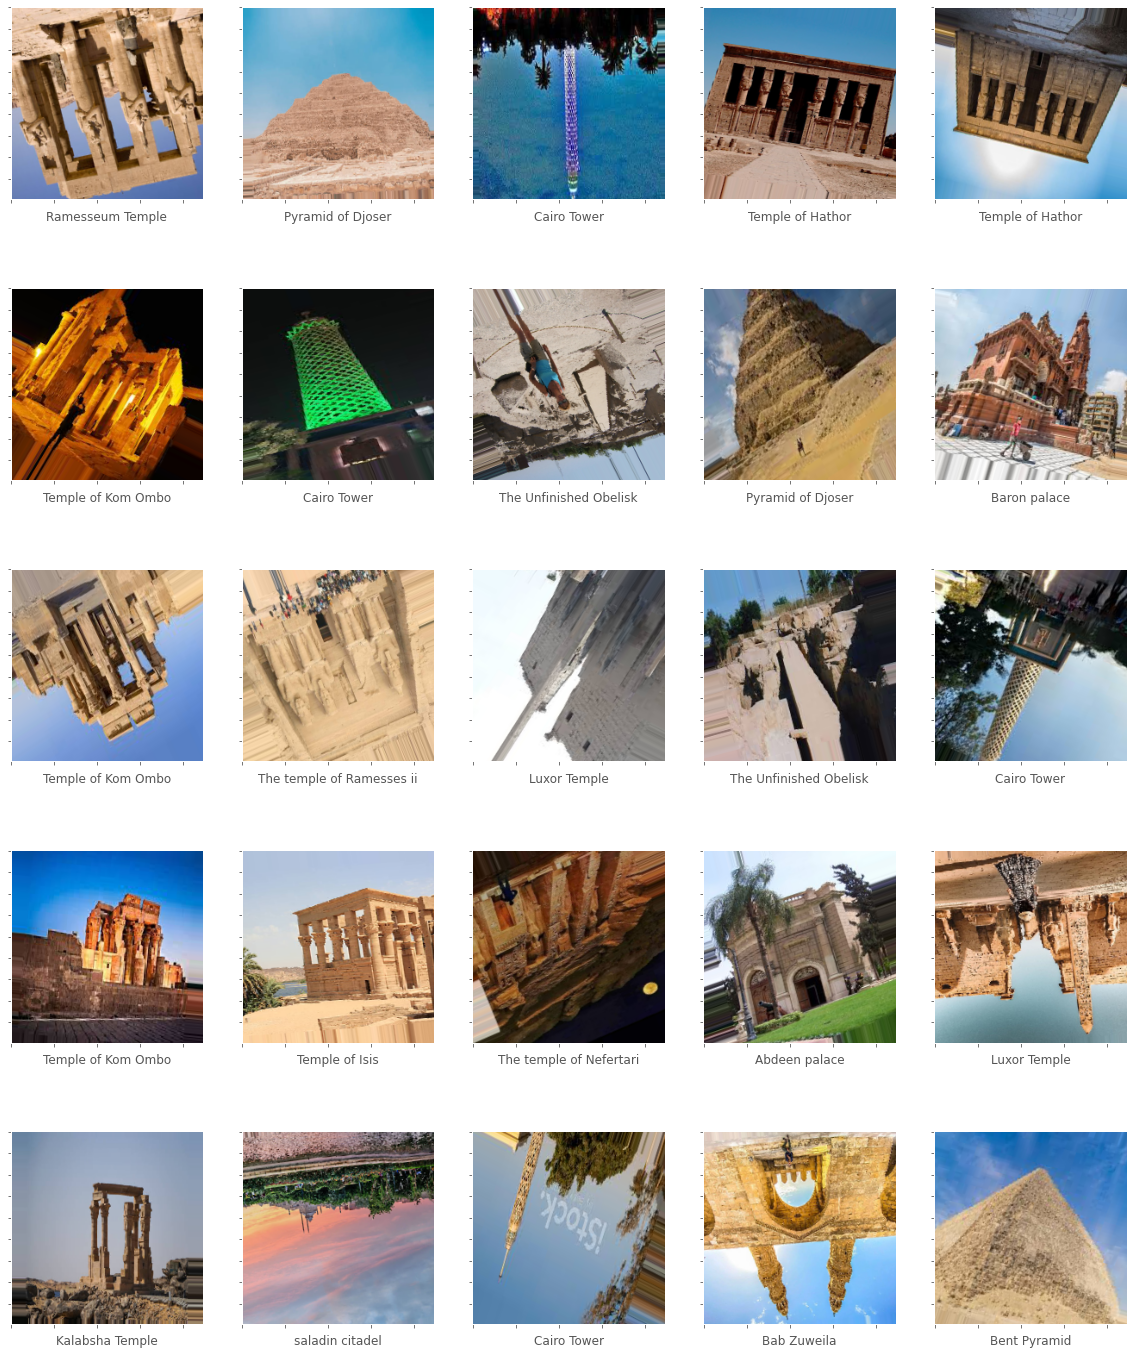

In [ ]:
# Encode the classes
classes = train.class_indices
classes = {indx: c for c, indx in classes.items()}


#PLotting some images
images, labels=train.next()
plt.figure(figsize=(20,25))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    #plt.axis('off')
    plt.grid(False)
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel(classes[np.argmax(labels[i])])

**Load Base Model**

In [ ]:
import tensorflow_hub as hub

baseline = hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
           trainable=False) # we're not training baseline model's layers to prevent overfitting

**Build Model**

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model using sequential API
model = tf.keras.Sequential([
      baseline,
      tf.keras.layers.Dense(23, activation = "softmax")
])

# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ["accuracy"])



**Train Model**

In [ ]:
# fit the model
es = EarlyStopping(monitor='val_accuracy',patience=90,verbose=1,mode='max')
mc = ModelCheckpoint(MODEL_CHECKPOINT_FILEPATH,monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)
lr = ReduceLROnPlateau(monitor='val_accuracy',factor=0.1,min_lr=0.001,patience=15,mode='max',verbose=1)

history = model.fit(
    train,
    validation_data=valid,
    batch_size = 32,
    epochs=15,
    callbacks=[es,mc,lr]
)


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/15
93/93 [==============================] - ETA: 0s - loss: 1.9177 - accuracy: 0.5307
Epoch 1: val_accuracy improved from -inf to 0.72279, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 761s 8s/step - loss: 1.9177 - accuracy: 0.5307 - val_loss: 1.2352 - val_accuracy: 0.7228 - lr: 0.0010
Epoch 2/15
93/93 [==============================] - ETA: 0s - loss: 0.9186 - accuracy: 0.8068
Epoch 2: val_accuracy improved from 0.72279 to 0.81567, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 84s 904ms/step - loss: 0.9186 - accuracy: 0.8068 - val_loss: 0.7936 - val_accuracy: 0.8157 - lr: 0.0010
Epoch 3/15
93/93 [==============================] - ETA: 0s - loss: 0.6496 - accuracy: 0.8544
Epoch 3: val_accuracy improved from 0.81567 to 0.83164, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 83s 898ms/step - loss: 0.6496 - accuracy: 0.8544 - val_loss: 0.6372 - val_accuracy: 0.8316 - lr: 0.0010
Epoch 4/15
93/93 [==============================] - ETA: 0s - loss: 0.5271 - accuracy: 0.8804
Epoch 4: val_accuracy improved from 0.83164 to 0.84615, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 83s 897ms/step - loss: 0.5271 - accuracy: 0.8804 - val_loss: 0.5580 - val_accuracy: 0.8462 - lr: 0.0010
Epoch 5/15
93/93 [==============================] - ETA: 0s - loss: 0.4414 - accuracy: 0.9027
Epoch 5: val_accuracy improved from 0.84615 to 0.88534, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 83s 895ms/step - loss: 0.4414 - accuracy: 0.9027 - val_loss: 0.4644 - val_accuracy: 0.8853 - lr: 0.0010
Epoch 6/15
93/93 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.9091
Epoch 6: val_accuracy did not improve from 0.88534
93/93 [==============================] - 70s 755ms/step - loss: 0.3912 - accuracy: 0.9091 - val_loss: 0.4430 - val_accuracy: 0.8853 - lr: 0.0010
Epoch 7/15
93/93 [==============================] - ETA: 0s - loss: 0.3371 - accuracy: 0.9240
Epoch 7: val_accuracy did not improve from 0.88534
93/93 [==============================] - 69s 739ms/step - loss: 0.3371 - accuracy: 0.9240 - val_loss: 0.4346 - val_accuracy: 0.8723 - lr: 0.0010
Epoch 8/15
93/93 [==============================] - ETA: 0s - loss: 0.3080 - accuracy: 0.9318
Epoch 8: val_accuracy did not improve from 0.88534
93/93 [==============================] - 70s 756ms/step - loss: 0.3080 - accuracy: 0.9318 - val_loss: 0.4036 - val_accuracy: 0.882

93/93 [==============================] - 81s 875ms/step - loss: 0.2762 - accuracy: 0.9405 - val_loss: 0.3894 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 10/15
93/93 [==============================] - ETA: 0s - loss: 0.2627 - accuracy: 0.9446
Epoch 10: val_accuracy improved from 0.88970 to 0.89115, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 81s 877ms/step - loss: 0.2627 - accuracy: 0.9446 - val_loss: 0.3759 - val_accuracy: 0.8911 - lr: 0.0010
Epoch 11/15
93/93 [==============================] - ETA: 0s - loss: 0.2382 - accuracy: 0.9520
Epoch 11: val_accuracy did not improve from 0.89115
93/93 [==============================] - 69s 745ms/step - loss: 0.2382 - accuracy: 0.9520 - val_loss: 0.3728 - val_accuracy: 0.8853 - lr: 0.0010
Epoch 12/15
93/93 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9534
Epoch 12: val_accuracy improved from 0.89115 to 0.89550, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 82s 880ms/step - loss: 0.2173 - accuracy: 0.9534 - val_loss: 0.3456 - val_accuracy: 0.8955 - lr: 0.0010
Epoch 13/15
93/93 [==============================] - ETA: 0s - loss: 0.2080 - accuracy: 0.9611
Epoch 13: val_accuracy improved from 0.89550 to 0.89840, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 82s 878ms/step - loss: 0.2080 - accuracy: 0.9611 - val_loss: 0.3479 - val_accuracy: 0.8984 - lr: 0.0010
Epoch 14/15
93/93 [==============================] - ETA: 0s - loss: 0.1893 - accuracy: 0.9649
Epoch 14: val_accuracy did not improve from 0.89840
93/93 [==============================] - 69s 741ms/step - loss: 0.1893 - accuracy: 0.9649 - val_loss: 0.3463 - val_accuracy: 0.8955 - lr: 0.0010
Epoch 15/15
93/93 [==============================] - ETA: 0s - loss: 0.1748 - accuracy: 0.9632
Epoch 15: val_accuracy improved from 0.89840 to 0.89985, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 82s 884ms/step - loss: 0.1748 - accuracy: 0.9632 - val_loss: 0.3356 - val_accuracy: 0.8999 - lr: 0.0010


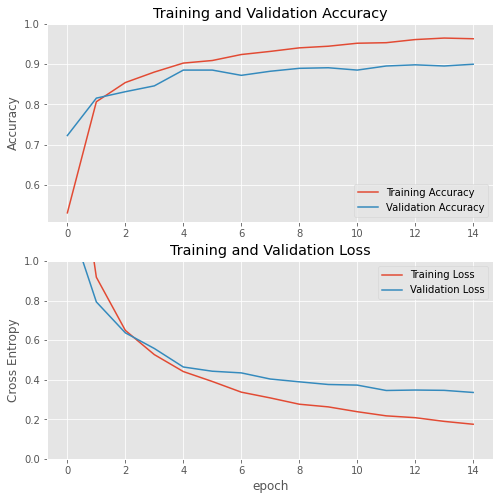

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Fine tune all layers of the model**

In [ ]:
model.layers[0].trainable = True

In [ ]:
# recompile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # use lower learning rate when fine-tuning
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ["accuracy"])

In [ ]:
history_1 = model.fit(train,
                      epochs = 25,
                      validation_data = valid,
                      callbacks=[es,mc,lr],
                      initial_epoch = 15)

Epoch 16/25
93/93 [==============================] - ETA: 0s - loss: 0.6288 - accuracy: 0.8355
Epoch 16: val_accuracy did not improve from 0.89985
93/93 [==============================] - 129s 812ms/step - loss: 0.6288 - accuracy: 0.8355 - val_loss: 0.4029 - val_accuracy: 0.8810 - lr: 1.0000e-04
Epoch 17/25
93/93 [==============================] - ETA: 0s - loss: 0.2288 - accuracy: 0.9399
Epoch 17: val_accuracy improved from 0.89985 to 0.90421, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 91s 976ms/step - loss: 0.2288 - accuracy: 0.9399 - val_loss: 0.2979 - val_accuracy: 0.9042 - lr: 1.0000e-04
Epoch 18/25
93/93 [==============================] - ETA: 0s - loss: 0.1561 - accuracy: 0.9581
Epoch 18: val_accuracy improved from 0.90421 to 0.91147, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 91s 982ms/step - loss: 0.1561 - accuracy: 0.9581 - val_loss: 0.3063 - val_accuracy: 0.9115 - lr: 1.0000e-04
Epoch 19/25
93/93 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9747
Epoch 19: val_accuracy improved from 0.91147 to 0.92163, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 90s 974ms/step - loss: 0.1053 - accuracy: 0.9747 - val_loss: 0.2789 - val_accuracy: 0.9216 - lr: 1.0000e-04
Epoch 20/25
93/93 [==============================] - ETA: 0s - loss: 0.0732 - accuracy: 0.9851
Epoch 20: val_accuracy improved from 0.92163 to 0.92743, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 90s 971ms/step - loss: 0.0732 - accuracy: 0.9851 - val_loss: 0.2816 - val_accuracy: 0.9274 - lr: 1.0000e-04
Epoch 21/25
93/93 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 0.9861
Epoch 21: val_accuracy improved from 0.92743 to 0.93179, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 90s 973ms/step - loss: 0.0595 - accuracy: 0.9861 - val_loss: 0.2906 - val_accuracy: 0.9318 - lr: 1.0000e-04
Epoch 22/25
93/93 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9895
Epoch 22: val_accuracy did not improve from 0.93179
93/93 [==============================] - 74s 794ms/step - loss: 0.0428 - accuracy: 0.9895 - val_loss: 0.2851 - val_accuracy: 0.9318 - lr: 1.0000e-04
Epoch 23/25
93/93 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9905
Epoch 23: val_accuracy improved from 0.93179 to 0.93324, saving model to /content/drive/MyDrive/landmarks-Classifier-Model-Checkpoint.ckpt


93/93 [==============================] - 92s 992ms/step - loss: 0.0412 - accuracy: 0.9905 - val_loss: 0.3061 - val_accuracy: 0.9332 - lr: 1.0000e-04
Epoch 24/25
93/93 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9932
Epoch 24: val_accuracy did not improve from 0.93324
93/93 [==============================] - 75s 807ms/step - loss: 0.0324 - accuracy: 0.9932 - val_loss: 0.2813 - val_accuracy: 0.9332 - lr: 1.0000e-04
Epoch 25/25
93/93 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9946
Epoch 25: val_accuracy did not improve from 0.93324
93/93 [==============================] - 74s 800ms/step - loss: 0.0306 - accuracy: 0.9946 - val_loss: 0.2477 - val_accuracy: 0.9332 - lr: 1.0000e-04


In [ ]:
acc += history_1.history['accuracy']
val_acc += history_1.history['val_accuracy']

loss += history_1.history['loss']
val_loss += history_1.history['val_loss']

initial_epochs = 15

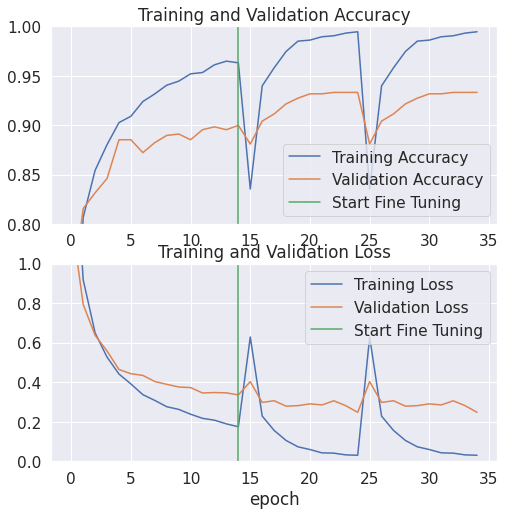

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Evaluate Model Accuracy on Test Data**

In [ ]:
model.load_weights(MODEL_CHECKPOINT_FILEPATH)
scores = model.evaluate(test)
print("%s%s: %0.2f%%"%("The model had an accuracy score of ",model.metrics_names[1],scores[1]*100))

20/20 [==============================] - 8s 413ms/step - loss: 0.1777 - accuracy: 0.9525
The model had an accuracy score of accuracy: 95.25%


In [ ]:
pred=model.predict(test,verbose=1)
y_pred = np.argmax(pred, axis=1)

20/20 [==============================] - 10s 473ms/step


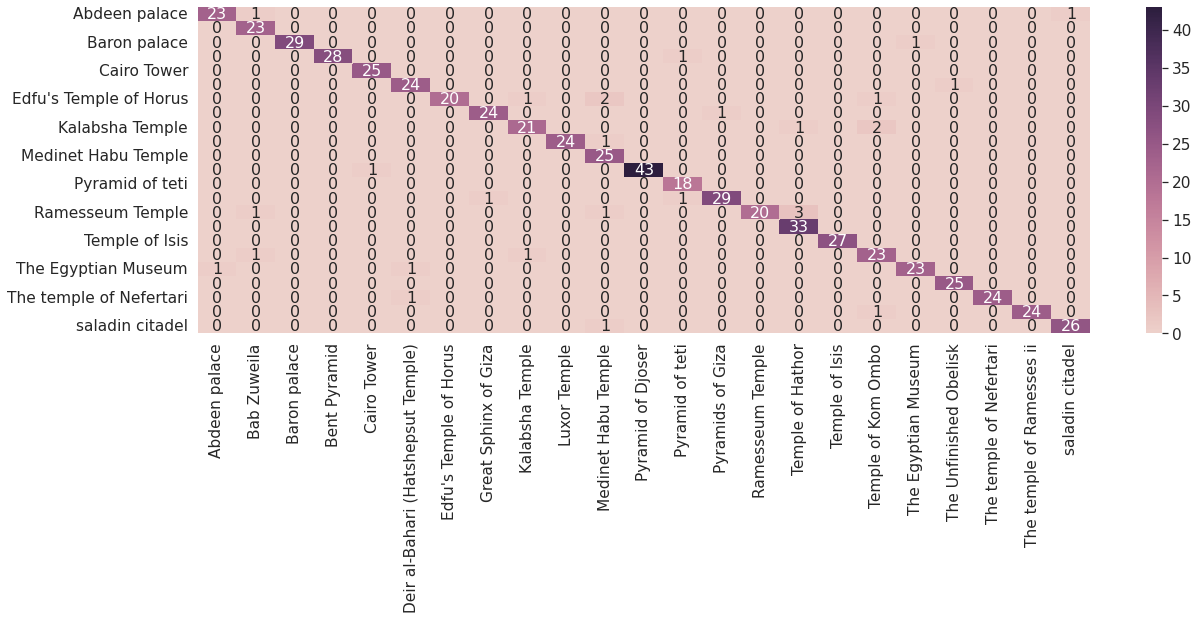

In [ ]:
cm = confusion_matrix(y_true = test.classes,y_pred= y_pred)
cm = pd.DataFrame(cm, index=train.class_indices.keys(), columns=train.class_indices.keys())
plt.figure(figsize=(20,6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16},cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/model4.h5')